# Analyzing our first single-cell paper

In [1]:
author_year = 'Alkon23'
dataset_id = 'GSE222840'

In [2]:
import os
import logging
import warnings
import numpy as np
import pandas as pd
import scanpy as sc


In [3]:
import requests

# URL for the GSE222840_RAW.tar file from GEO
url = "https://ftp.ncbi.nlm.nih.gov/geo/series/GSE222nnn/GSE222840/suppl/GSE222840_RAW.tar"

# Local path to save the file
local_filename = "GSE222840_RAW.tar"

# Stream the download to avoid loading the whole file into memory
with requests.get(url, stream=True) as response:
    response.raise_for_status()
    with open(local_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

print(f"Downloaded {local_filename} successfully!")


Downloaded GSE222840_RAW.tar successfully!


In [4]:
import tarfile
import os

# Path to the .tar file you downloaded
tar_file = "GSE222840_RAW.tar"

# Directory where you want to extract the contents
extract_dir = "GSE222840_RAW"

# Open the tar file and extract its contents
with tarfile.open(tar_file, "r") as tar:
    # Check if the extraction directory exists, if not, create it
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)
    
    # Extract all files to the specified directory
    tar.extractall(path=extract_dir)

# Remove the .tar file after extraction
if os.path.exists(tar_file):
    os.remove(tar_file)
    print(f"Removed {tar_file}")

print(f"Extracted all files to {extract_dir} and removed the .tar file!")


Removed GSE222840_RAW.tar
Extracted all files to GSE222840_RAW and removed the .tar file!


In [5]:
os.listdir('GSE222840_RAW')

['GSM6932986_P74_AD1_features.tsv.gz',
 'GSM6932988_P77_AD3_matrix.mtx.gz',
 'GSM6932991_P96_AP_features.tsv.gz',
 'GSM6932995_P155_PN4_barcodes.tsv.gz',
 'GSM6932993_PWB2_PN2_matrix.mtx.gz',
 'GSM6932994_P154_PN3_barcodes.tsv.gz',
 'GSM6932996_P157_PN5_features.tsv.gz',
 'GSM6932987_P75_AD2_matrix.mtx.gz',
 'GSM6932997_P185_PN6_matrix.mtx.gz',
 'GSM6932997_P185_PN6_barcodes.tsv.gz',
 'GSM6932992_P132_PN1_features.tsv.gz',
 'GSM6932993_PWB2_PN2_features.tsv.gz',
 'GSM6932989_P81_AD4_matrix.mtx.gz',
 'GSM6932994_P154_PN3_features.tsv.gz',
 'GSM6932986_P74_AD1_matrix.mtx.gz',
 'GSM6932991_P96_AP_matrix.mtx.gz',
 'GSM6932990_P96_AD5_features.tsv.gz',
 'GSM6932996_P157_PN5_matrix.mtx.gz',
 'GSM6932993_PWB2_PN2_barcodes.tsv.gz',
 'GSM6932996_P157_PN5_barcodes.tsv.gz',
 'GSM6932998_P205_PN7_matrix.mtx.gz',
 'GSM6932991_P96_AP_barcodes.tsv.gz',
 'GSM6932988_P77_AD3_features.tsv.gz',
 'GSM6932986_P74_AD1_barcodes.tsv.gz',
 'GSM6932995_P155_PN4_matrix.mtx.gz',
 'GSM6932997_P185_PN6_features.tsv

In [6]:
import os
import scanpy as sc

# Directory where the files are located
data_dir = 'GSE222840_RAW'

# Function to load data for each sample
def load_sample(prefix):
    return sc.read_10x_mtx(
        data_dir, 
        var_names='gene_symbols',  # Use gene symbols as var names
        prefix=prefix,  # Prefix for the files
        cache=True
    )

# Get a list of all files in the directory
all_files = os.listdir(data_dir)

# Get the unique prefixes by identifying unique parts of the filenames before '_matrix.mtx.gz'
prefixes = sorted(set(f.split('matrix.mtx.gz')[0] for f in all_files if 'matrix.mtx.gz' in f))

# List to store the loaded AnnData objects
adatas = []

# Loop over prefixes and load the corresponding sample data
for prefix in prefixes:
    adata = load_sample(prefix)
    adatas.append(adata)
    print(f"Loaded {prefix}")


Loaded GSM6932986_P74_AD1_
Loaded GSM6932987_P75_AD2_
Loaded GSM6932988_P77_AD3_
Loaded GSM6932989_P81_AD4_
Loaded GSM6932990_P96_AD5_
Loaded GSM6932991_P96_AP_
Loaded GSM6932992_P132_PN1_
Loaded GSM6932993_PWB2_PN2_
Loaded GSM6932994_P154_PN3_
Loaded GSM6932995_P155_PN4_
Loaded GSM6932996_P157_PN5_
Loaded GSM6932997_P185_PN6_
Loaded GSM6932998_P205_PN7_


In [7]:
for prefix, adata in zip(prefixes, adatas):
    adata.obs['sample_id'] = prefix.strip('_')

In [16]:
adata.obs

,sample_id
AAACCTGAGATCCGAG-1,GSM6932986_P74_AD1
AAACCTGAGCACAGGT-1,GSM6932986_P74_AD1
AAACCTGAGCAGCGTA-1,GSM6932986_P74_AD1
AAACCTGAGCGAGAAA-1,GSM6932986_P74_AD1
AAACCTGAGCTCCTCT-1,GSM6932986_P74_AD1
...,...
TTTGTCATCGCGCCAA-1,GSM6932998_P205_PN7
TTTGTCATCGGAAACG-1,GSM6932998_P205_PN7
TTTGTCATCGGCTACG-1,GSM6932998_P205_PN7
TTTGTCATCGTCTGCT-1,GSM6932998_P205_PN7


In [9]:
adatas

[AnnData object with n_obs × n_vars = 10935 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 15324 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 36129 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 15799 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 18259 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 13853 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 2872 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 15951 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 20960 × 36601
     obs: 'sample_id'
     var: 'gene_ids', '

In [8]:
adata = sc.concat(adatas)

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [17]:
adata

AnnData object with n_obs × n_vars = 207785 × 36601
    obs: 'sample_id'

In [18]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))

In [22]:
adata.var.loc[adata.var["mt"]]

,mt,ribo
MT-ND1,True,False
MT-ND2,True,False
MT-CO1,True,False
MT-CO2,True,False
MT-ATP8,True,False
MT-ATP6,True,False
MT-CO3,True,False
MT-ND3,True,False
MT-ND4L,True,False
MT-ND4,True,False


In [23]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo"], inplace=True, log1p=True
)

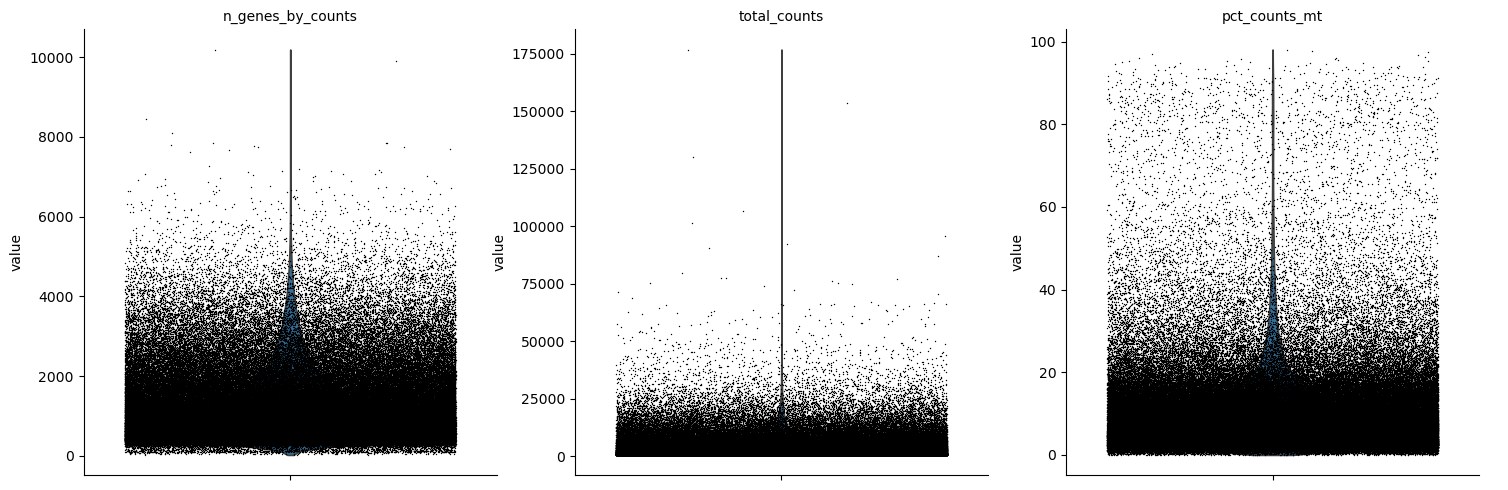

In [24]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

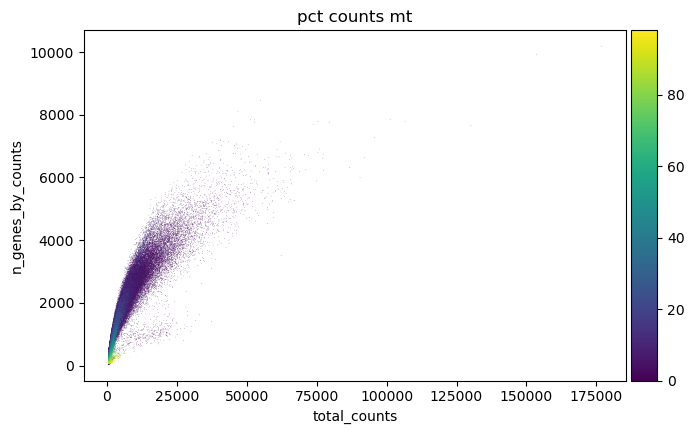

In [25]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")


In [26]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [27]:
adata

AnnData object with n_obs × n_vars = 207516 × 28674
    obs: 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [ ]:
sc.pp.subsample(adata, fraction=0.1, copy=False)

In [29]:
sc.pp.scrublet(adata, batch_key="sample_id")

In [ ]:
adata.layers["counts"] = adata.X.copy()